# Import required libraries

In [2]:
# Python library used for working with arrays.
import numpy as np

# Python library used for working with data sets.
# Is used for analyzing, cleaning, exploring, and manipulating data.
import pandas as pd

# Most of the Matplotlib utilities lies under the pyplot submodule.
import matplotlib.pyplot as plt

# Huge open-source library for computer vision.
import cv2

# Framework for implementing ML & Deep Learning models.
import tensorflow as tf

# Provides many basic operations on images like create thumnails, resize, 
# rotation, convert between different file formats etc.
from PIL import Image

# OS module provides functions for interacting with the operating system,
# such as with the file system.
import os
# Change current working directory
os.chdir('D:/TSR') 

# Split arrays or matrices into random train and test subsets.
from sklearn.model_selection import train_test_split

# Returns a matrix of binary values. It has #rows = length of the input vector,
# #columns = number of classes.
from keras.utils import to_categorical

# A sequential model allows us to create models layer by layer in a step by step fashion.
# load_model loads a model saved via model.save().
from keras.models import Sequential, load_model

# Layers to be used in the model architecture.
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Using TensorFlow backend.


# Store data & labels in lists

In [3]:
# Initialising list for storing the data (images) and labels.
data = []
labels = []

# In all we have 43 classes (from 0 to 42)
classes = 43

# Returns current working directory of a process.
cur_path = os.getcwd()

In [4]:
classes

43

In [5]:
cur_path

'D:\\TSR'

# Preprocess the images

In [6]:
# Iterating over all the 43 classes (folders of these classes)
for i in range(classes):
    # Storing the path of the current folder of "Train"
    path = os.path.join(cur_path, 'train', str(i))
    
    # Returns the list of all files and directories in the specified path.
    images = os.listdir(path)
    
    # iterating over all the images of the current class 'i'
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

# Convert data & labels lists to numpy arrays

In [7]:
data = np.array(data)
labels = np.array(labels)

# Save data & labels for future use

In [11]:
# Function used to store the input array in a disk file with npy extension(.npy)
np.save('./training/data', data)
np.save('./training/target', labels)

# Load data & labels

In [12]:
# Function used to return the input array from a disk file with npy extension(.npy).
data = np.load('./training/data.npy')
labels = np.load('./training/target.npy')

In [13]:
# "shape" returns a tuple with each index having the number of elements in each dimension.
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


# Splitting the training data in train & test data

In [14]:
# The training set is used to train the model, while the validation set is only used to evaluate the model's performance.
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 0)

In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# Converting labels to onehot encoding

In [16]:
# One-hot encoding is used to quantify categorical data. In short, this method produces a vector with 
# length equal to the number of categories in the data set.
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Building the model based on LeNet-5 CNN architecture

In [18]:
# Defining and fitting the final model.
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5, 5), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(units = 256, activation = 'relu'))

model.add(Dense(units = 128, activation = 'relu'))

# As we have 43 classes in total as our result
model.add(Dense(units = 43, activation = 'softmax'))

# Compiling the model

In [20]:
# Compile defines the loss function, the optimizer and the metrics of the loaded model.
#  Config the model with losses and metrics.
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [21]:
# An epoch is a term that indicates the number of passes of the entire training dataset through 
# the model. If dataset size is d, #epochs is e, #iterations is i, and batch size is b, then relation
# between them would be d*e = i*b. 
epochs = 20

# Training the model with model.fit()
history = model.fit(X_train, y_train, batch_size = 32, epochs = epochs, validation_data = (X_test, y_test))


Train on 31367 samples, validate on 7842 samples
Epoch 1/20
31367/31367 [==============================] - 108s 3ms/step - loss: 1.0535 - accuracy: 0.7864 - val_loss: 0.3489 - val_accuracy: 0.9125
Epoch 2/20
31367/31367 [==============================] - 107s 3ms/step - loss: 0.2222 - accuracy: 0.9417 - val_loss: 0.3647 - val_accuracy: 0.9129
Epoch 3/20
31367/31367 [==============================] - 111s 4ms/step - loss: 0.1837 - accuracy: 0.9523 - val_loss: 0.2096 - val_accuracy: 0.9505
Epoch 4/20
31367/31367 [==============================] - 111s 4ms/step - loss: 0.1293 - accuracy: 0.9668 - val_loss: 0.3051 - val_accuracy: 0.9271
Epoch 5/20
31367/31367 [==============================] - 111s 4ms/step - loss: 0.1619 - accuracy: 0.9615 - val_loss: 0.1833 - val_accuracy: 0.9603
Epoch 6/20
31367/31367 [==============================] - 112s 4ms/step - loss: 0.1260 - accuracy: 0.9701 - val_loss: 0.1590 - val_accuracy: 0.9680
Epoch 7/20
31367/31367 [==============================] - 112s

# Accuracy v/s Epochs graph

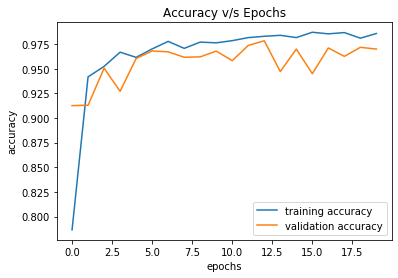

In [22]:
plt.figure(0)
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.title('Accuracy v/s Epochs')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Loss v/s Epochs graph

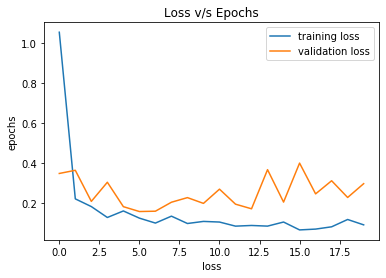

In [23]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.title('Loss v/s Epochs')
plt.xlabel('loss')
plt.ylabel('epochs')
plt.legend()
plt.show()

# Testing the model on Test data

In [24]:
# Function used in testing the model
def testing(testcsv):
    test_file = pd.read_csv(testcsv)
    y_test = test_file["ClassId"].values
    imgs = test_file["Path"].values
    data = []
    
    # Iterating over all the images in the test set
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30, 30))
        data.append(np.array(image))
        
    X_test = np.array(data)
    
    # Return X_test (all the images) and y_test (all the labels of the images)
    return X_test, y_test

In [25]:
# X_test = all the new instances where the model already do not know the answer.
# y_test = he correct answers by which cross checking will be done.
X_test, y_test = testing('Test.csv')

In [26]:
# Make predictions
Y_pred = model.predict_classes(X_test)

In [28]:
Y_pred

array([16,  1, 38, ..., 42,  7, 10], dtype=int64)

# Accuracy obtained with Test data

In [30]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, Y_pred))

0.9197149643705463


# Save the model

In [31]:
model.save("./training/TSR.h5")

# Load the model

In [32]:
import os
os.chdir('D:\TSR')
from keras.models import load_model
model = load_model('./training/TSR.h5')

# Testing on some random traffic signs

In [33]:
# Dictionary to store the actual name of the traffic sign correspondingto it's label
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

In [34]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def test_on_img(img):
    data = []
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image))
    X_test = np.array(data)
    Y_pred = model.predict_classes(X_test)
    return image, Y_pred

Predicted traffic sign is:  Ahead only


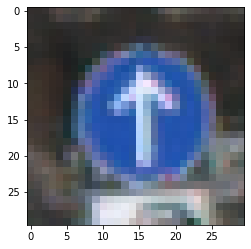

In [46]:
plot, prediction = test_on_img(r'D:\TSR\Test\12623.png')
s = [str(i) for i in prediction]
a = int("".join(s))

print("Predicted traffic sign is: ", classes[a])

# imshow() is pyplot module of matplotlib library used to display data as an image; i.e. on a 2D regular raster.
plt.imshow(plot)
plt.show()